# Jupyter print all

In [39]:
from IPython import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'


# Imports

In [87]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.nonparametric.smoothers_lowess import lowess


# Canada

## Read data

In [41]:
df_can = pd.read_csv('clean_data/cleaned-canada-covid.csv',
                     parse_dates=['date'])
df_can.columns
df_can = df_can.fillna(0)
df_can[(df_can.iloc[:, 2:] < 0).any(axis=1)]
# -1 breaks anova tests
df_can.loc[567, 'new_deaths'] = 0
df_can.head()
df_can.tail()


Index(['iso_code', 'date', 'total_cases', 'new_cases', 'total_deaths',
       'new_deaths', 'total_cases_per_million', 'new_cases_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'people_vaccinated', 'people_vaccinated_per_hundred'],
      dtype='object')

,iso_code,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,people_vaccinated,people_vaccinated_per_hundred
567,CAN,2021-08-15,1459070.0,744.0,26701.0,-1.0,38328.08,19.544,701.404,-0.026,27469840.0,72.16


,iso_code,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,people_vaccinated,people_vaccinated_per_hundred
0,CAN,2020-01-26,1.0,1.0,0.0,0.0,0.026,0.026,0.0,0.0,0.0,0.0
1,CAN,2020-01-27,1.0,0.0,0.0,0.0,0.026,0.000,0.0,0.0,0.0,0.0
2,CAN,2020-01-28,2.0,1.0,0.0,0.0,0.053,0.026,0.0,0.0,0.0,0.0
3,CAN,2020-01-29,2.0,0.0,0.0,0.0,0.053,0.000,0.0,0.0,0.0,0.0
4,CAN,2020-01-30,2.0,0.0,0.0,0.0,0.053,0.000,0.0,0.0,0.0,0.0


,iso_code,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,people_vaccinated,people_vaccinated_per_hundred
678,CAN,2021-12-04,1813304.0,2479.0,29819.0,8.0,47633.397,65.120,783.311,0.210,30755662.0,80.79
679,CAN,2021-12-05,1815686.0,2382.0,29821.0,2.0,47695.969,62.572,783.363,0.053,30815618.0,80.95
680,CAN,2021-12-06,1820693.0,5007.0,29854.0,33.0,47827.497,131.528,784.230,0.867,30916886.0,81.22
681,CAN,2021-12-07,1823674.0,2981.0,29880.0,26.0,47905.805,78.307,784.913,0.683,30976960.0,81.37
682,CAN,2021-12-08,1827339.0,3665.0,29905.0,25.0,48002.080,96.275,785.570,0.657,31043333.0,81.55


In [42]:
df_can_no = df_can[df_can['people_vaccinated_per_hundred'] == 0]
df_can_00 = df_can[(00 < df_can['people_vaccinated_per_hundred'])
                   & (df_can['people_vaccinated_per_hundred'] <= 20)]
df_can_20 = df_can[(20 < df_can['people_vaccinated_per_hundred'])
                   & (df_can['people_vaccinated_per_hundred'] <= 40)]
df_can_40 = df_can[(40 < df_can['people_vaccinated_per_hundred'])
                   & (df_can['people_vaccinated_per_hundred'] <= 60)]
df_can_60 = df_can[(60 < df_can['people_vaccinated_per_hundred'])
                   & (df_can['people_vaccinated_per_hundred'] <= 80)]
df_can_80 = df_can[(80 < df_can['people_vaccinated_per_hundred'])
                   & (df_can['people_vaccinated_per_hundred'] <= 100)]

df_can_all = [df_can_no, df_can_00, df_can_20, df_can_40, df_can_60, df_can_80]


## Data for comparing other country

In [43]:
for i in df_can_all:
    i.sort_values('date').iloc[[0, -1], :]['date']


0     2020-01-26
324   2020-12-15
Name: date, dtype: datetime64[ns]

325   2020-12-16
442   2021-04-12
Name: date, dtype: datetime64[ns]

443   2021-04-13
470   2021-05-10
Name: date, dtype: datetime64[ns]

471   2021-05-11
494   2021-06-03
Name: date, dtype: datetime64[ns]

495   2021-06-04
673   2021-11-29
Name: date, dtype: datetime64[ns]

674   2021-11-30
682   2021-12-08
Name: date, dtype: datetime64[ns]

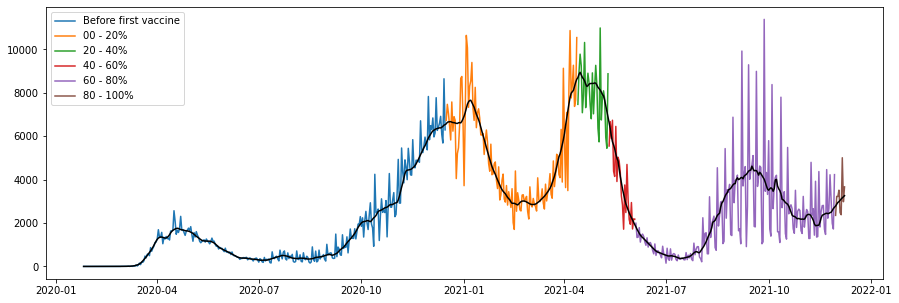

In [103]:
_ = plt.figure(figsize=(15, 5))
for i in df_can_all:
    _ = plt.plot(i['date'], i['new_cases'])
_ = plt.legend(['Before first vaccine', '00 - 20%', '20 - 40%',
               '40 - 60%', '60 - 80%', '80 - 100%'])
ls = lowess(df_can['new_cases'], df_can['date'], frac=1/50)
_ = plt.plot(df_can['date'], ls[:, 1], 'k-')


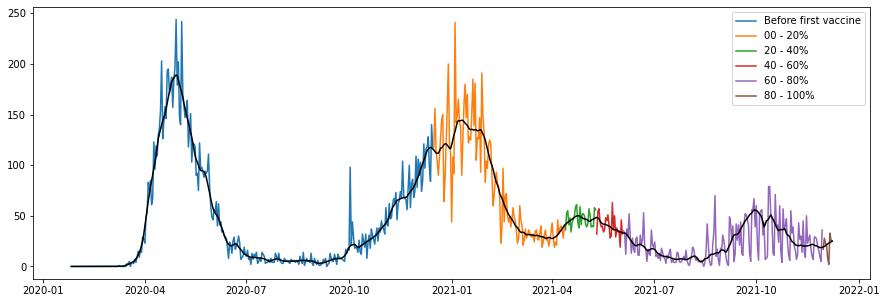

In [104]:
_ = plt.figure(figsize=(15, 5))
for i in df_can_all:
    _ = plt.plot(i['date'], i['new_deaths'])
_ = plt.legend(['Before first vaccine', '00 - 20%', '20 - 40%',
               '40 - 60%', '60 - 80%', '80 - 100%'])
ls = lowess(df_can['new_deaths'], df_can['date'], frac=1/50)
_ = plt.plot(df_can['date'], ls[:, 1], 'k-')


## No vaccine vs vaccine

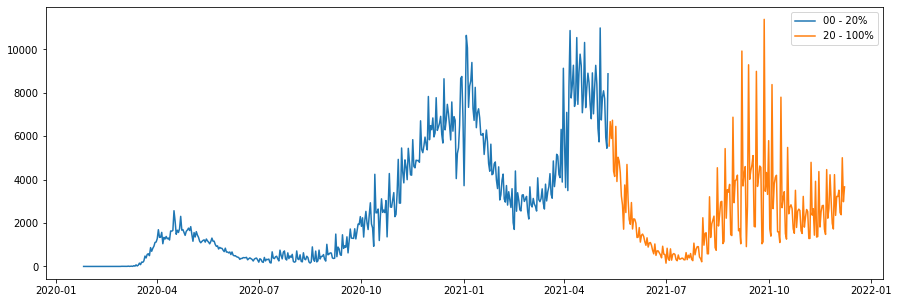

In [107]:
_ = plt.figure(figsize=(15, 5))
_ = plt.plot(
    pd.concat([*df_can_all[:3]])['date'],
    pd.concat([*df_can_all[:3]])['new_cases']
)
_ = plt.plot(
    pd.concat([*df_can_all[3:]])['date'],
    pd.concat([*df_can_all[3:]])['new_cases']
)
_ = plt.legend(['00 - 20%', '20 - 100%'])


## Check for normal distribution

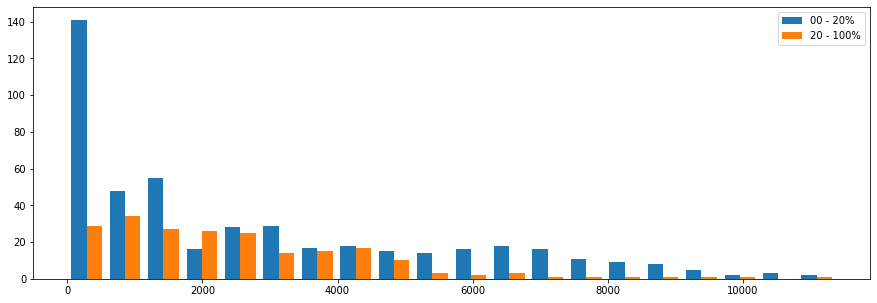

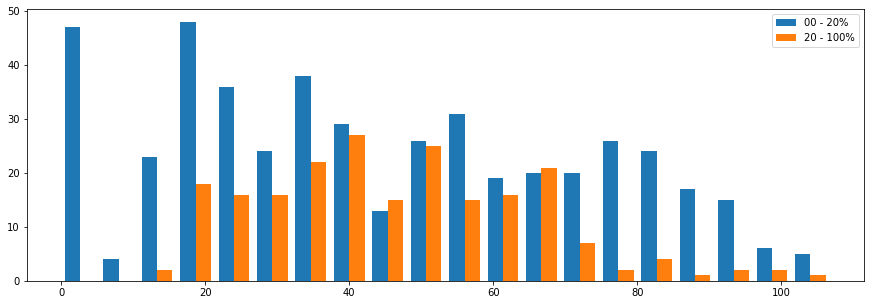

In [47]:
_ = plt.figure(figsize=(15, 5))
_ = plt.hist([
    pd.concat([*df_can_all[:3]])['new_cases'],
    pd.concat([*df_can_all[3:]])['new_cases']
], bins=20)
_ = plt.legend(['00 - 20%', '20 - 100%'])
plt.show()

_ = plt.figure(figsize=(15, 5))
_ = plt.hist([
    np.sqrt(pd.concat([*df_can_all[:3]])['new_cases']),
    np.sqrt(pd.concat([*df_can_all[3:]])['new_cases'])
], bins=20)
_ = plt.legend(['00 - 20%', '20 - 100%'])


## ANOVA test

In [48]:
anova = stats.f_oneway(
    np.sqrt(pd.concat([*df_can_all[:3]])['new_cases']),
    np.sqrt(pd.concat([*df_can_all[3:]])['new_cases'])
)

print(anova.pvalue)
print('Is there a difference between means? '
      + f'{"yes" if anova.pvalue < 0.05 else "no"}')


0.4484332419126139
Is there a difference between means? no


## Post Hoc

group1,group2,meandiff,p-adj,lower,upper,reject
00 - 20%,20 - 100%,1.6036,0.4484,-2.5476,5.7547,False


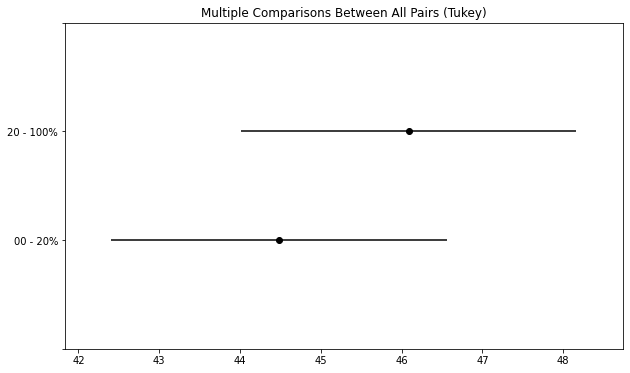

In [49]:
x_data = pd.DataFrame({
    '00 - 20%': np.sqrt(pd.concat([*df_can_all[:3]])['new_cases']),
    '20 - 100%': np.sqrt(pd.concat([*df_can_all[3:]])['new_cases'])
})
x_melt = pd.melt(x_data).dropna()
posthoc = pairwise_tukeyhsd(x_melt['value'], x_melt['variable'], alpha=0.05)
posthoc.summary()
_ = posthoc.plot_simultaneous()


## Discussion

The graph above seems to suggest that over the course of the pandemic there has not been a decrease in cases since the vaccine started rolling out. It seems that there could be a slight increase over that time instead. This could be due to more people going out, and perhaps less deaths so the risk involved in going out is lower.

## Check for difference in death rates

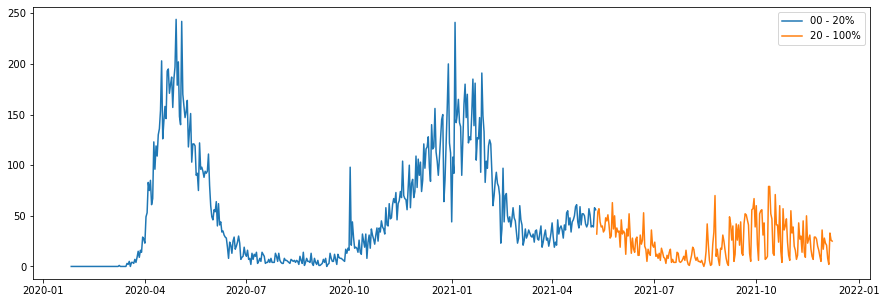

In [50]:
_ = plt.figure(figsize=(15, 5))
_ = plt.plot(
    pd.concat([*df_can_all[:3]])['date'],
    pd.concat([*df_can_all[:3]])['new_deaths']
)
_ = plt.plot(
    pd.concat([*df_can_all[3:]])['date'],
    pd.concat([*df_can_all[3:]])['new_deaths']
)
_ = plt.legend(['00 - 20%', '20 - 100%'])


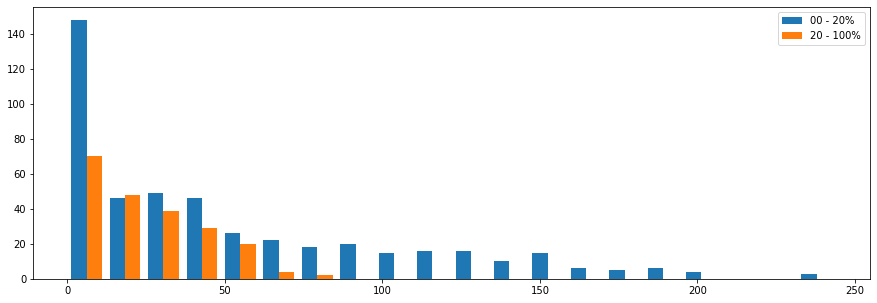

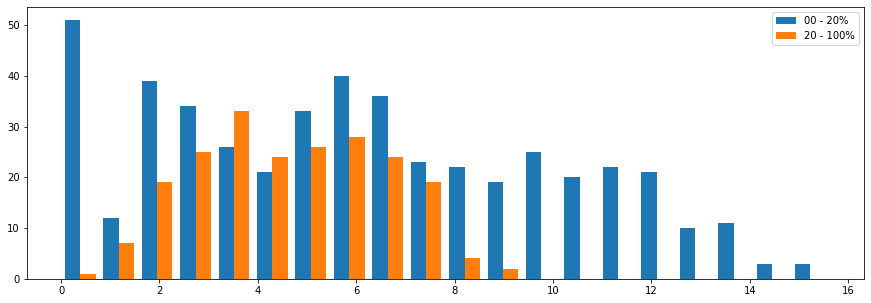

In [51]:
_ = plt.figure(figsize=(15, 5))
_ = plt.hist([
    pd.concat([*df_can_all[:3]])['new_deaths'],
    pd.concat([*df_can_all[3:]])['new_deaths']
], bins=20)
_ = plt.legend(['00 - 20%', '20 - 100%'])
plt.show()

_ = plt.figure(figsize=(15, 5))
_ = plt.hist([
    np.sqrt(pd.concat([*df_can_all[:3]])['new_deaths']),
    np.sqrt(pd.concat([*df_can_all[3:]])['new_deaths'])
], bins=20)
_ = plt.legend(['00 - 20%', '20 - 100%'])


## ANOVA test

In [52]:
anova = stats.f_oneway(
    np.sqrt(pd.concat([*df_can_all[:3]])['new_deaths']),
    np.sqrt(pd.concat([*df_can_all[3:]])['new_deaths'])
)

print(anova.pvalue)
print('Is there a difference between means? '
      + f'{"yes" if anova.pvalue < 0.05 else "no"}')


4.473680191624605e-07
Is there a difference between means? yes


## Post Hoc

group1,group2,meandiff,p-adj,lower,upper,reject
00 - 20%,20 - 100%,-1.4601,0.001,-2.0225,-0.8976,True


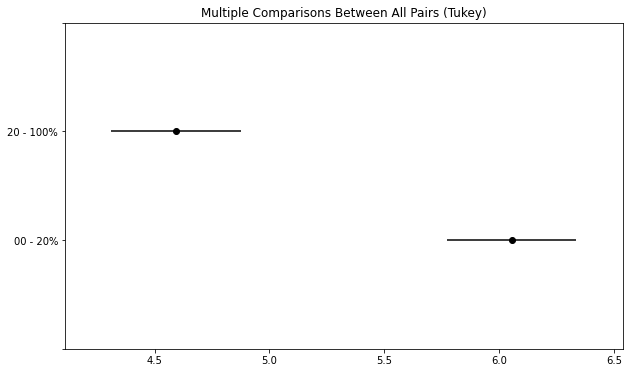

In [53]:
x_data = pd.DataFrame({
    '00 - 20%': np.sqrt(pd.concat([*df_can_all[:3]])['new_deaths']),
    '20 - 100%': np.sqrt(pd.concat([*df_can_all[3:]])['new_deaths'])
})
x_melt = pd.melt(x_data).dropna()
posthoc = pairwise_tukeyhsd(x_melt['value'], x_melt['variable'], alpha=0.05)
posthoc.summary()
_ = posthoc.plot_simultaneous()


## Discussion

There is significant difference in the death rate before there was a vaccine available, and the death rate of COVID. With approxmiately 80%[1] of the population currently vaccinated, the death rate has dropped. At what percentage does the vaccine have a significant change in death rate?

[1] https://covid19tracker.ca/vaccinationtracker.html

# USA

## Read data

In [54]:
df_us = pd.read_csv('clean_data/cleaned-usa-covid.csv', parse_dates=['date'])
df_us.columns
df_us = df_us.fillna(0)
df_us[(df_us.iloc[:, 2:] < 0).any(axis=1)]
# -1 breaks anova tests
df_us.loc[567, 'new_deaths'] = 0
df_us.head()
df_us.tail()


Index(['iso_code', 'date', 'total_cases', 'new_cases', 'total_deaths',
       'new_deaths', 'total_cases_per_million', 'new_cases_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'people_vaccinated', 'people_vaccinated_per_hundred'],
      dtype='object')

,iso_code,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,people_vaccinated,people_vaccinated_per_hundred


,iso_code,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,people_vaccinated,people_vaccinated_per_hundred
0,USA,2020-01-22,1.0,0.0,0.0,0.0,0.003,0.000,0.0,0.0,0.0,0.0
1,USA,2020-01-23,1.0,0.0,0.0,0.0,0.003,0.000,0.0,0.0,0.0,0.0
2,USA,2020-01-24,2.0,1.0,0.0,0.0,0.006,0.003,0.0,0.0,0.0,0.0
3,USA,2020-01-25,2.0,0.0,0.0,0.0,0.006,0.000,0.0,0.0,0.0,0.0
4,USA,2020-01-26,5.0,3.0,0.0,0.0,0.015,0.009,0.0,0.0,0.0,0.0


,iso_code,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,people_vaccinated,people_vaccinated_per_hundred
682,USA,2021-12-04,49051855.0,61055.0,788362.0,507.0,147340.445,183.395,2368.057,1.523,236672022.0,71.28
683,USA,2021-12-05,49086070.0,34215.0,788523.0,161.0,147443.219,102.774,2368.541,0.484,236813028.0,71.33
684,USA,2021-12-06,49278987.0,192917.0,789907.0,1384.0,148022.697,579.478,2372.698,4.157,237042326.0,71.40
685,USA,2021-12-07,49387995.0,109008.0,791516.0,1609.0,148350.131,327.435,2377.531,4.833,237087376.0,71.41
686,USA,2021-12-08,49539734.0,151739.0,793230.0,1714.0,148805.920,455.789,2382.680,5.148,237087380.0,71.41


In [55]:
df_us1 = df_us[df_us['date'] <= pd.to_datetime('2020-12-15')]
df_us2 = df_us[(pd.to_datetime('2020-12-15') < df_us['date'])
               & (df_us['date'] <= pd.to_datetime('2021-04-12'))]
df_us3 = df_us[(pd.to_datetime('2021-04-12') < df_us['date'])
               & (df_us['date'] <= pd.to_datetime('2021-05-10'))]
df_us4 = df_us[(pd.to_datetime('2021-05-10') < df_us['date'])
               & (df_us['date'] <= pd.to_datetime('2021-06-03'))]
df_us5 = df_us[(pd.to_datetime('2021-06-03') < df_us['date'])
               & (df_us['date'] <= pd.to_datetime('2021-11-29'))]
df_us6 = df_us[pd.to_datetime('2021-11-29') < df_us['date']]

df_us_all = [df_us1, df_us2, df_us3, df_us4, df_us5, df_us6]


## Data for comparing other country

In [56]:
for i in df_us_all:
    i.sort_values('date').iloc[[0, -1], :]['date']


0     2020-01-22
328   2020-12-15
Name: date, dtype: datetime64[ns]

329   2020-12-16
446   2021-04-12
Name: date, dtype: datetime64[ns]

447   2021-04-13
474   2021-05-10
Name: date, dtype: datetime64[ns]

475   2021-05-11
498   2021-06-03
Name: date, dtype: datetime64[ns]

499   2021-06-04
677   2021-11-29
Name: date, dtype: datetime64[ns]

678   2021-11-30
686   2021-12-08
Name: date, dtype: datetime64[ns]

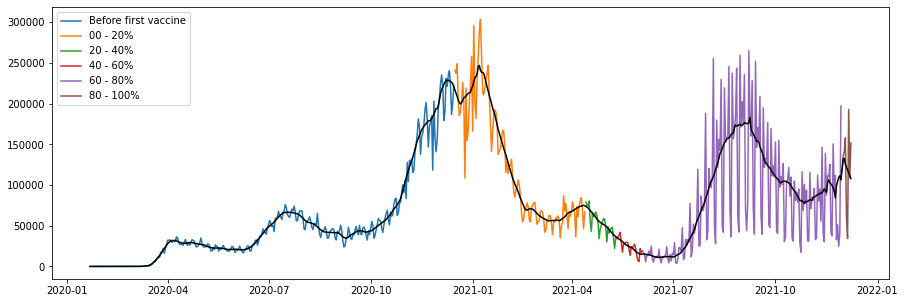

In [109]:
_ = plt.figure(figsize=(15, 5))
for i in df_us_all:
    _ = plt.plot(i['date'], i['new_cases'])
_ = plt.legend(['Before first vaccine', '00 - 20%', '20 - 40%',
               '40 - 60%', '60 - 80%', '80 - 100%'])
ls = lowess(df_us['new_cases'], df_us['date'], frac=1/50)
_ = plt.plot(df_us['date'], ls[:, 1], 'k-')


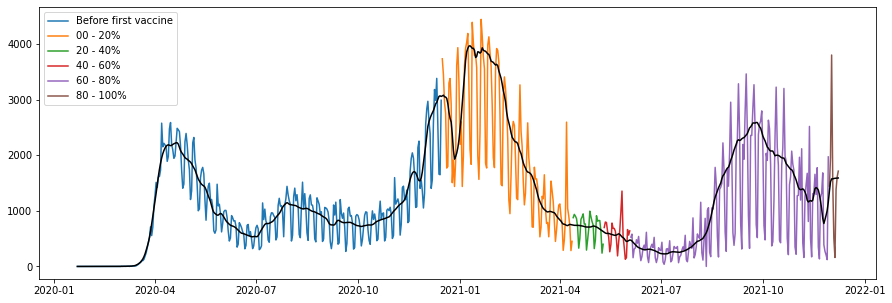

In [117]:
_ = plt.figure(figsize=(15, 5))
for i in df_us_all:
    _ = plt.plot(i['date'], i['new_deaths'])
_ = plt.legend(['Before first vaccine', '00 - 20%', '20 - 40%',
               '40 - 60%', '60 - 80%', '80 - 100%'])
ls = lowess(df_us['new_deaths'], df_us['date'], frac=1/50)
_ = plt.plot(df_us['date'], ls[:, 1], 'k-')


## No vaccine vs vaccine

In [59]:
range(0, 9)[:3]
range(0, 9)[3:]


range(0, 3)

range(3, 9)

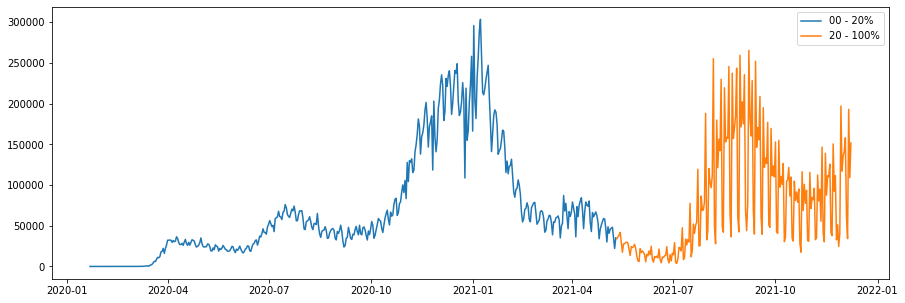

In [60]:
_ = plt.figure(figsize=(15, 5))
_ = plt.plot(
    pd.concat([*df_us_all[:3]])['date'],
    pd.concat([*df_us_all[:3]])['new_cases']
)
_ = plt.plot(
    pd.concat([*df_us_all[3:]])['date'],
    pd.concat([*df_us_all[3:]])['new_cases']
)
_ = plt.legend(['00 - 20%', '20 - 100%'])


## Check for normal distribution

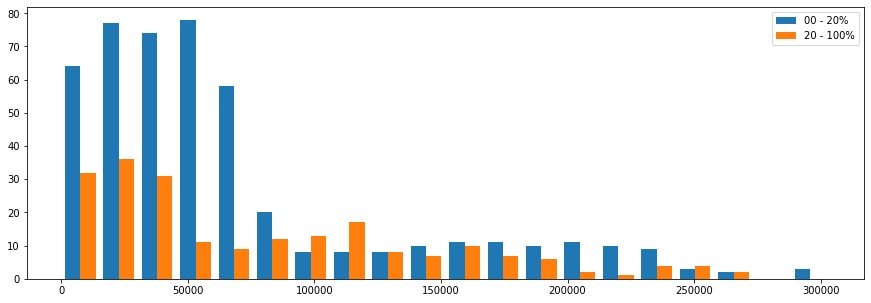

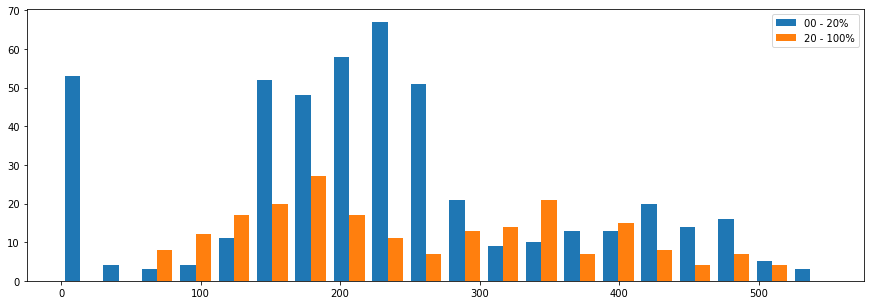

In [61]:
_ = plt.figure(figsize=(15, 5))
_ = plt.hist([
    pd.concat([*df_us_all[:3]])['new_cases'],
    pd.concat([*df_us_all[3:]])['new_cases']
], bins=20)
_ = plt.legend(['00 - 20%', '20 - 100%'])
plt.show()

_ = plt.figure(figsize=(15, 5))
_ = plt.hist([
    np.sqrt(pd.concat([*df_us_all[:3]])['new_cases']),
    np.sqrt(pd.concat([*df_us_all[3:]])['new_cases'])
], bins=20)
_ = plt.legend(['00 - 20%', '20 - 100%'])


## ANOVA test

In [62]:
anova = stats.f_oneway(
    np.sqrt(pd.concat([*df_us_all[:3]])['new_cases']),
    np.sqrt(pd.concat([*df_us_all[3:]])['new_cases'])
)

print(anova.pvalue)
print('Is there a difference between means? '
      + f'{"yes" if anova.pvalue < 0.05 else "no"}')


0.0156550140870044
Is there a difference between means? yes


## Post Hoc

group1,group2,meandiff,p-adj,lower,upper,reject
00 - 20%,20 - 100%,24.9471,0.0157,4.7309,45.1633,True


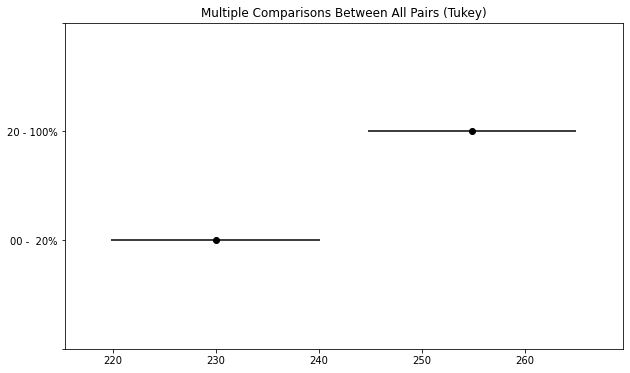

In [63]:
x_data = pd.DataFrame({
    '00 -  20%': np.sqrt(pd.concat([*df_us_all[:3]])['new_cases']),
    '20 - 100%': np.sqrt(pd.concat([*df_us_all[3:]])['new_cases'])
})
x_melt = pd.melt(x_data).dropna()
posthoc = pairwise_tukeyhsd(x_melt['value'], x_melt['variable'], alpha=0.05)
posthoc.summary()
_ = posthoc.plot_simultaneous()


## Discussion

There also seems to be an increase in case counts in the US as well. The data also seems to be a bit more sparratic as each day can very huge amounts from the last.

## Check for difference in death rates

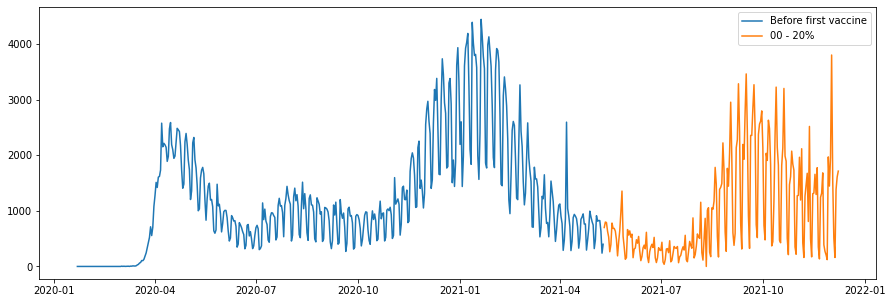

In [64]:
_ = plt.figure(figsize=(15, 5))
_ = plt.plot(
    pd.concat([*df_us_all[:3]])['date'],
    pd.concat([*df_us_all[:3]])['new_deaths']
)
_ = plt.plot(
    pd.concat([*df_us_all[3:]])['date'],
    pd.concat([*df_us_all[3:]])['new_deaths']
)
_ = plt.legend(['Before first vaccine', '00 - 20%',
               '20 - 240%', '40 - 60%', '60 - 80%', '80 - 100%'])


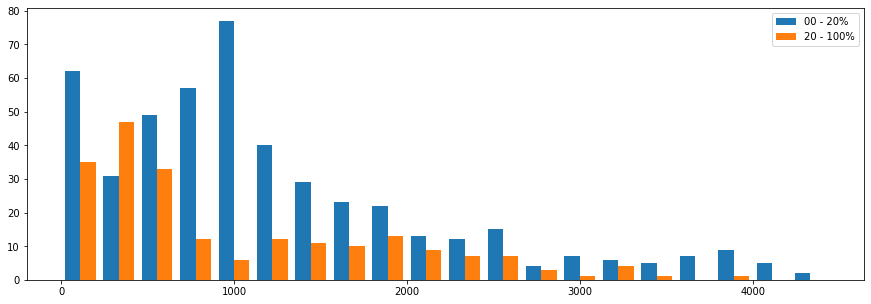

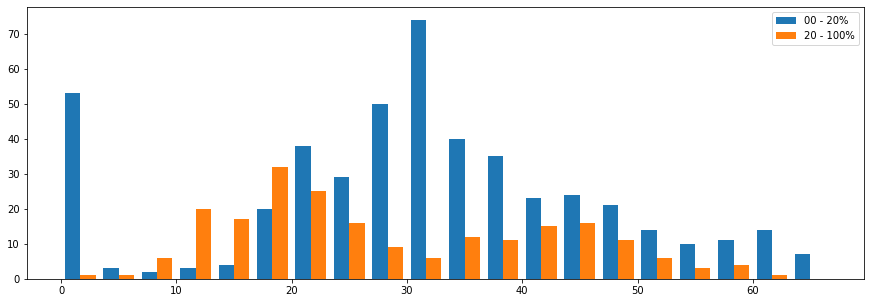

In [65]:
_ = plt.figure(figsize=(15, 5))
_ = plt.hist([
    pd.concat([*df_us_all[:3]])['new_deaths'],
    pd.concat([*df_us_all[3:]])['new_deaths']
], bins=20)
_ = plt.legend(['00 - 20%', '20 - 100%'])
plt.show()

_ = plt.figure(figsize=(15, 5))
_ = plt.hist([
    np.sqrt(pd.concat([*df_us_all[:3]])['new_deaths']),
    np.sqrt(pd.concat([*df_us_all[3:]])['new_deaths'])
], bins=20)
_ = plt.legend(['00 - 20%', '20 - 100%'])


## ANOVA test

In [66]:
anova = stats.f_oneway(
    np.sqrt(pd.concat([*df_us_all[:3]])['new_deaths']),
    np.sqrt(pd.concat([*df_us_all[3:]])['new_deaths'])
)

print(anova.pvalue)
print('Is there a difference between means? '
      + f'{"yes" if anova.pvalue < 0.05 else "no"}')


0.029057453577483294
Is there a difference between means? yes


## Post Hoc

group1,group2,meandiff,p-adj,lower,upper,reject
00 - 20%,20 - 100%,-2.7482,0.0291,-5.2151,-0.2813,True


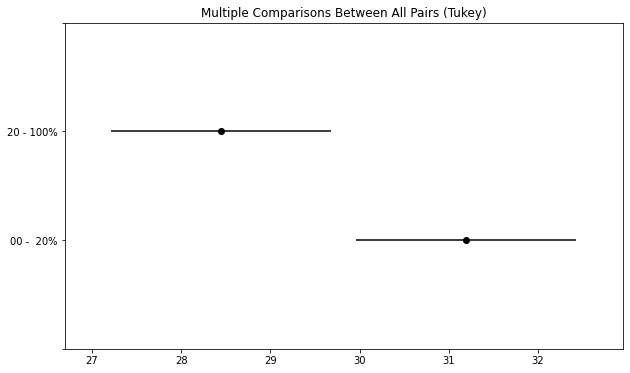

In [67]:
x_data = pd.DataFrame({
    '00 -  20%': np.sqrt(pd.concat([*df_us_all[:3]])['new_deaths']),
    '20 - 100%': np.sqrt(pd.concat([*df_us_all[3:]])['new_deaths'])
})
x_melt = pd.melt(x_data).dropna()
posthoc = pairwise_tukeyhsd(x_melt['value'], x_melt['variable'], alpha=0.05)
posthoc.summary()
_ = posthoc.plot_simultaneous()


## Discussion

There seems to also be a decrease in deaths in the US after the vaccine rollout. The difference seems to be not as large of a difference as Canada.

# Canada against US

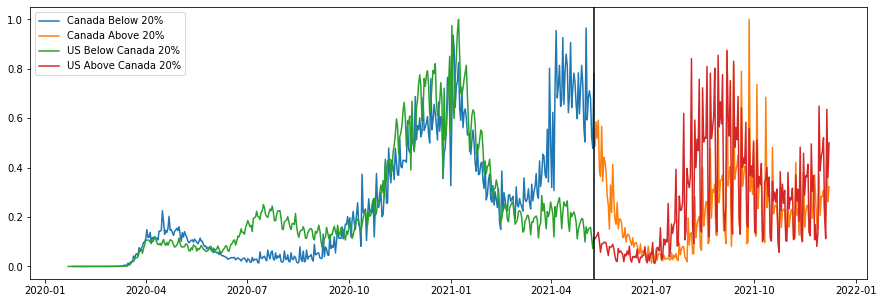

In [136]:
_ = plt.figure(figsize=(15, 5))
_ = plt.plot(pd.concat([*df_can_all[:3]])['date'],
             pd.concat([*df_can_all[:3]])['new_cases']
             / df_can['new_cases'].max())
_ = plt.plot(pd.concat([*df_can_all[3:]])['date'],
             pd.concat([*df_can_all[3:]])['new_cases']
             / df_can['new_cases'].max())
_ = plt.plot(pd.concat([*df_us_all[:3]])['date'],
             pd.concat([*df_us_all[:3]])['new_cases']
             / df_us['new_cases'].max())
_ = plt.plot(pd.concat([*df_us_all[3:]])['date'],
             pd.concat([*df_us_all[3:]])['new_cases']
             / df_us['new_cases'].max())
_ = plt.legend(['Canada Below 20%', 'Canada Above 20%',
               'US Below Canada 20%', 'US Above Canada 20%'])
plt.axvline(df_can_all[2]['date'].max(), color='k')


## Check for normal distribution

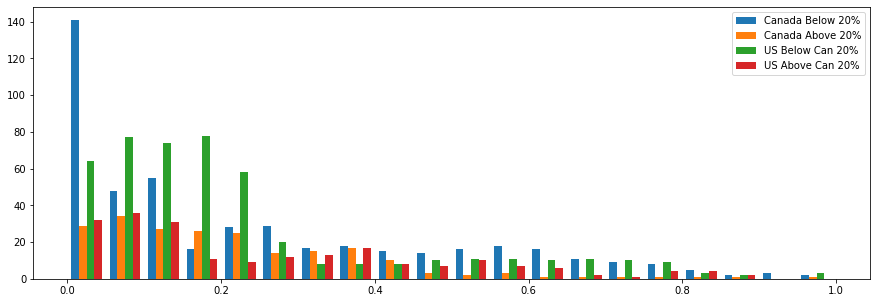

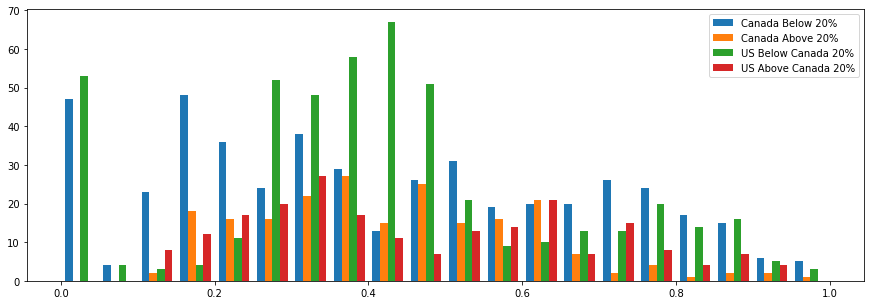

In [69]:
_ = plt.figure(figsize=(15, 5))
_ = plt.hist([
    pd.concat([*df_can_all[:3]])['new_cases'] / df_can['new_cases'].max(),
    pd.concat([*df_can_all[3:]])['new_cases'] / df_can['new_cases'].max(),
    pd.concat([*df_us_all[:3]])['new_cases'] / df_us['new_cases'].max(),
    pd.concat([*df_us_all[3:]])['new_cases'] / df_us['new_cases'].max()
], bins=20)
_ = plt.legend(['Canada Below 20%', 'Canada Above 20%',
               'US Below Can 20%', 'US Above Can 20%'])

_ = plt.figure(figsize=(15, 5))
_ = plt.hist([
    np.sqrt(pd.concat([*df_can_all[:3]])['new_cases']
            / df_can['new_cases'].max()),
    np.sqrt(pd.concat([*df_can_all[3:]])['new_cases']
            / df_can['new_cases'].max()),
    np.sqrt(pd.concat([*df_us_all[:3]])['new_cases']
            / df_us['new_cases'].max()),
    np.sqrt(pd.concat([*df_us_all[3:]])['new_cases']
            / df_us['new_cases'].max())
], bins=20)
_ = plt.legend(['Canada Below 20%', 'Canada Above 20%',
               'US Below Canada 20%', 'US Above Canada 20%'])


## ANOVA test

In [70]:
anova = stats.f_oneway(
    np.sqrt(pd.concat([*df_can_all[:3]])['new_cases']
            / df_can['new_cases'].max()),
    np.sqrt(pd.concat([*df_can_all[3:]])['new_cases']
            / df_can['new_cases'].max()),
    np.sqrt(pd.concat([*df_us_all[:3]])['new_cases']
            / df_us['new_cases'].max()),
    np.sqrt(pd.concat([*df_us_all[3:]])['new_cases']
            / df_us['new_cases'].max())
)

print(anova.pvalue)
print('Is there a difference between means? '
      + f'{"yes" if anova.pvalue < 0.05 else "no"}')


0.0809720884304586
Is there a difference between means? no


## Post Hoc

group1,group2,meandiff,p-adj,lower,upper,reject
Canada Above 20%,Canada Below 20%,-0.015,0.8474,-0.0646,0.0345,False
Canada Above 20%,US Above Canada 20%,0.0307,0.5237,-0.0275,0.0889,False
Canada Above 20%,US Below Canada 20%,-0.0146,0.8602,-0.0641,0.0349,False
Canada Below 20%,US Above Canada 20%,0.0457,0.0828,-0.0038,0.0953,False
Canada Below 20%,US Below Canada 20%,0.0005,0.9,-0.0385,0.0394,False
US Above Canada 20%,US Below Canada 20%,-0.0453,0.0871,-0.0948,0.0042,False


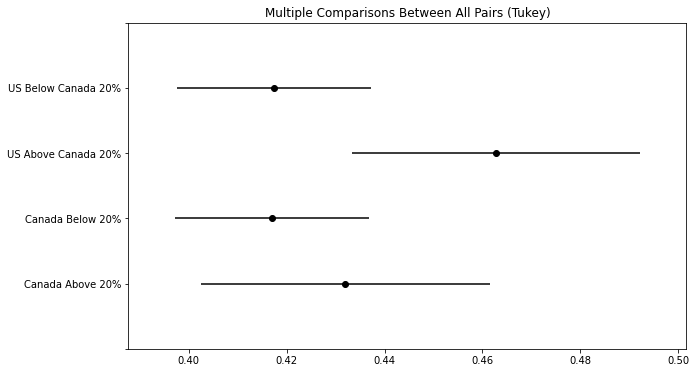

In [71]:
x_data = pd.DataFrame({
    'Canada Below 20%': np.sqrt(pd.concat([*df_can_all[:3]])['new_cases']
                                / df_can['new_cases'].max()),
    'Canada Above 20%': np.sqrt(pd.concat([*df_can_all[3:]])['new_cases']
                                / df_can['new_cases'].max()),
    'US Below Canada 20%': np.sqrt(pd.concat([*df_us_all[:3]])['new_cases']
                                / df_us['new_cases'].max()),
    'US Above Canada 20%': np.sqrt(pd.concat([*df_us_all[3:]])['new_cases']
                                / df_us['new_cases'].max())
})

x_melt = pd.melt(x_data).dropna()
posthoc = pairwise_tukeyhsd(x_melt['value'], x_melt['variable'], alpha=0.05)
posthoc.summary()
_ = posthoc.plot_simultaneous()


## Discussion

There is an overlap at the start of the pandemic where Canada and US look the same. Towards the later part of the pandemic as Canada rolls out the vaccine, the number of cases relative to the maximum in canada is lower than the US.

## Check for difference in death rates

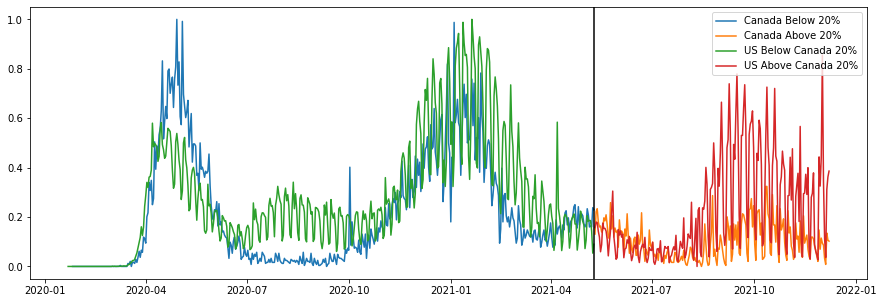

In [137]:
_ = plt.figure(figsize=(15, 5))
_ = plt.plot(pd.concat([*df_can_all[:3]])['date'],
             pd.concat([*df_can_all[:3]])['new_deaths']
             / df_can['new_deaths'].max())
_ = plt.plot(pd.concat([*df_can_all[3:]])['date'],
             pd.concat([*df_can_all[3:]])['new_deaths']
             / df_can['new_deaths'].max())
_ = plt.plot(pd.concat([*df_us_all[:3]])['date'],
             pd.concat([*df_us_all[:3]])['new_deaths']
             / df_us['new_deaths'].max())
_ = plt.plot(pd.concat([*df_us_all[3:]])['date'],
             pd.concat([*df_us_all[3:]])['new_deaths']
             / df_us['new_deaths'].max())
_ = plt.legend(['Canada Below 20%', 'Canada Above 20%',
               'US Below Canada 20%', 'US Above Canada 20%'])
plt.axvline(df_can_all[2]['date'].max(), color='k')


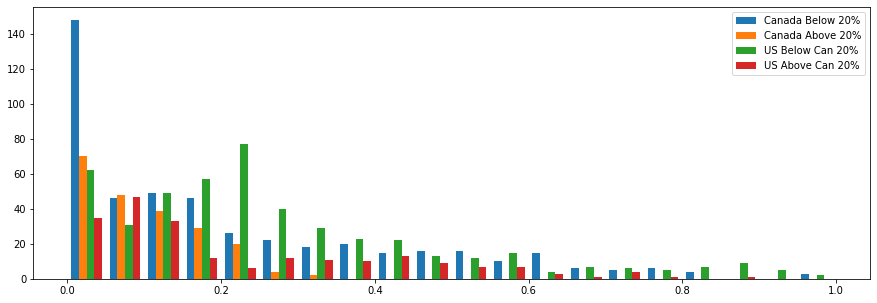

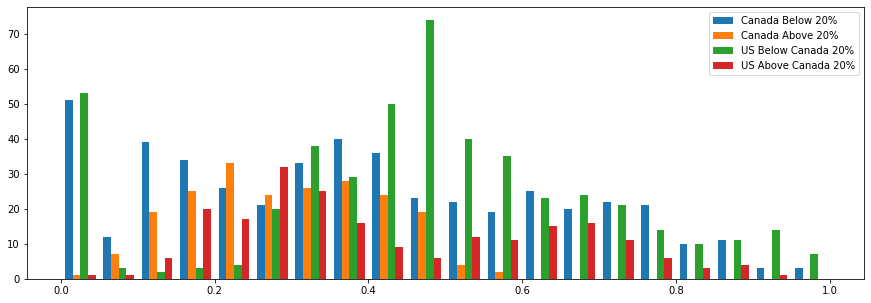

In [73]:
_ = plt.figure(figsize=(15, 5))
_ = plt.hist([
    pd.concat([*df_can_all[:3]])['new_deaths'] / df_can['new_deaths'].max(),
    pd.concat([*df_can_all[3:]])['new_deaths'] / df_can['new_deaths'].max(),
    pd.concat([*df_us_all[:3]])['new_deaths'] / df_us['new_deaths'].max(),
    pd.concat([*df_us_all[3:]])['new_deaths'] / df_us['new_deaths'].max()
], bins=20)
_ = plt.legend(['Canada Below 20%', 'Canada Above 20%',
               'US Below Can 20%', 'US Above Can 20%'])

_ = plt.figure(figsize=(15, 5))
_ = plt.hist([
    np.sqrt(pd.concat([*df_can_all[:3]])['new_deaths']
            / df_can['new_deaths'].max()),
    np.sqrt(pd.concat([*df_can_all[3:]])['new_deaths']
            / df_can['new_deaths'].max()),
    np.sqrt(pd.concat([*df_us_all[:3]])['new_deaths']
            / df_us['new_deaths'].max()),
    np.sqrt(pd.concat([*df_us_all[3:]])['new_deaths']
            / df_us['new_deaths'].max())
], bins=20)
_ = plt.legend(['Canada Below 20%', 'Canada Above 20%',
               'US Below Canada 20%', 'US Above Canada 20%'])


## ANOVA test

In [74]:
anova = stats.f_oneway(
    np.sqrt(pd.concat([*df_can_all[:3]])['new_cases']
            / df_can['new_cases'].max()),
    np.sqrt(pd.concat([*df_can_all[3:]])['new_cases']
            / df_can['new_cases'].max()),
    np.sqrt(pd.concat([*df_us_all[:3]])['new_cases']
            / df_us['new_cases'].max()),
    np.sqrt(pd.concat([*df_us_all[3:]])['new_cases']
            / df_us['new_cases'].max())
)

print(anova.pvalue)
print('Is there a difference between means? '
      + f'{"yes" if anova.pvalue < 0.05 else "no"}')


0.0809720884304586
Is there a difference between means? no


## Post Hoc

group1,group2,meandiff,p-adj,lower,upper,reject
Canada Above 20%,Canada Below 20%,0.0935,0.001,0.0456,0.1413,True
Canada Above 20%,US Above Can 20%,0.1328,0.001,0.0766,0.189,True
Canada Above 20%,US Below Can 20%,0.174,0.001,0.1262,0.2218,True
Canada Below 20%,US Above Can 20%,0.0393,0.1497,-0.0086,0.0872,False
Canada Below 20%,US Below Can 20%,0.0805,0.001,0.0429,0.1182,True
US Above Can 20%,US Below Can 20%,0.0412,0.1189,-0.0066,0.089,False


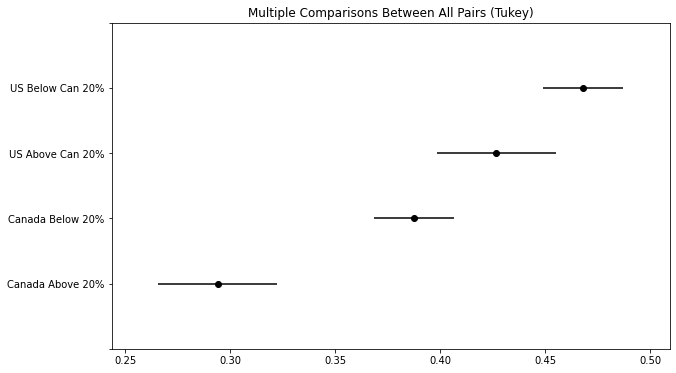

In [75]:
x_data = pd.DataFrame({
    'Canada Below 20%': np.sqrt(pd.concat([*df_can_all[:3]])['new_deaths']
                                / df_can['new_deaths'].max()),
    'Canada Above 20%': np.sqrt(pd.concat([*df_can_all[3:]])['new_deaths']
                                / df_can['new_deaths'].max()),
    'US Below Can 20%': np.sqrt(pd.concat([*df_us_all[:3]])['new_deaths']
                                / df_us['new_deaths'].max()),
    'US Above Can 20%': np.sqrt(pd.concat([*df_us_all[3:]])['new_deaths']
                                / df_us['new_deaths'].max())
})

x_melt = pd.melt(x_data).dropna()
posthoc = pairwise_tukeyhsd(x_melt['value'], x_melt['variable'], alpha=0.05)
posthoc.summary()
_ = posthoc.plot_simultaneous()


## Discussion